In [1]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)
data.columns =['sample code','clump Thickness','uniformity of cell size','uniformity of cell shape','marginal Adhesion','single Epthelial cell size','Bare Nuclei','Bland chromatin','Normal Nucleoli','mitoses','class']
data = data.drop(['sample code'],axis=1)
print('number of instances = %d' %(data.shape[0]))
print('number of attributes = %d'%(data.shape[1]))
data.head()

number of instances = 699
number of attributes = 10


,clump Thickness,uniformity of cell size,uniformity of cell shape,marginal Adhesion,single Epthelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
import numpy as np
data = data.replace('?',np.NaN)
print('number of instances = %d'% (data.shape[0]))
print('Number of attributes = %d'% (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
  print('\t%s: %d' % (col,data[col].isna().sum()))
data2 = data['Bare Nuclei']
print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())
print('\nAfter replacing missing values:')
print(data2[20:25])
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data.dropna()
print('Number of rows after disarding missing values = %d'%(data2.shape[0]))




number of instances = 699
Number of attributes = 10
Number of missing values:
	clump Thickness: 0
	uniformity of cell size: 0
	uniformity of cell shape: 0
	marginal Adhesion: 0
	single Epthelial cell size: 0
	Bare Nuclei: 16
	Bland chromatin: 0
	Normal Nucleoli: 0
	mitoses: 0
	class: 0
Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10
21     7
22     1
23     1
24     1
Name: Bare Nuclei, dtype: object
Number of rows in original data = 699
Number of rows after disarding missing values = 683


OUTLIERS


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


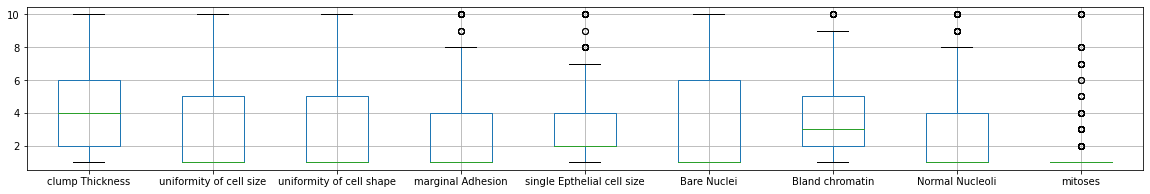

In [20]:
data2 = data.drop(['class'],axis=1)
data2['Bare Nuclei'] =pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))
    


In [21]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]


,clump Thickness,uniformity of cell size,uniformity of cell shape,marginal Adhesion,single Epthelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


In [22]:
print('Number of rows before discarding outliers = %d'% (Z.shape[0]))
Z2 = Z.loc[(Z>-3).sum(axis=1)==9)&((Z<=3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' %(Z2.shape[0]))


SyntaxError: ignored

Duplicate Data

In [5]:
dups = data.duplicated()
print('Number of dublicate rows = %d'%(dups.sum()))
data.loc[[11,28]]


Number of dublicate rows = 236


,clump Thickness,uniformity of cell size,uniformity of cell shape,marginal Adhesion,single Epthelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,mitoses,class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [6]:
print('Number of rows before discarding dublicates = %d'%(data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding dublicates = %d'%(data2.shape[0]))

Number of rows before discarding dublicates = 699
Number of rows after discarding dublicates = 463


Aggregation

In [7]:
daily = pd.read_csv('DTW_prec.csv',header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily precipitation(variance = %.4f)'%(daily.var()))


FileNotFoundError: ignored

In [11]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly precipitation(variance = %.4f)'%(monthly.var()))

NameError: ignored

In [12]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual precipitation(variance = %.4f)'%(annual.var()))

NameError: ignored

Samplin

In [13]:
data.head()

,clump Thickness,uniformity of cell size,uniformity of cell shape,marginal Adhesion,single Epthelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [14]:
sample = data.sample(n=3)
sample

,clump Thickness,uniformity of cell size,uniformity of cell shape,marginal Adhesion,single Epthelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,mitoses,class
352,3,4,5,3,7,3,4,6,1,2
87,3,6,6,6,5,10,6,8,3,4
562,1,1,1,1,2,1,3,1,1,2


In [15]:
sample = data.sample(frac=0.01,random_state=1)
sample

,clump Thickness,uniformity of cell size,uniformity of cell shape,marginal Adhesion,single Epthelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,mitoses,class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [16]:
sample = data.sample(frac=0.01,replace=True,random_state=1)
sample

,clump Thickness,uniformity of cell size,uniformity of cell shape,marginal Adhesion,single Epthelial cell size,Bare Nuclei,Bland chromatin,Normal Nucleoli,mitoses,class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


Discretization

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: clump Thickness, dtype: int64

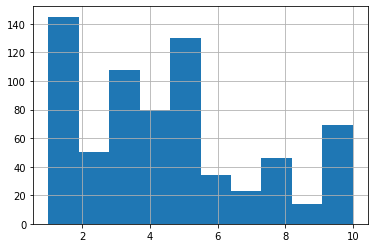

In [17]:
data['clump Thickness'].hist(bins=10)
data['clump Thickness'].value_counts(sort=False)

In [18]:
bins = pd.cut(data['clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: clump Thickness, dtype: int64

In [19]:
bins = pd.qcut(data['clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: clump Thickness, dtype: int64